# Plot RL convergence curve
- The data is obtained with Python code

In [1]:
using DataFrames, CSV, BSON
using BSON: @save, @load
using Plots, Plots.Measures
using LaTeXStrings
using NPZ
using Revise, HEMS

ENV["COLUMNS"] = 2000;

In [2]:
root_dir = "../../"
img_dir = joinpath(root_dir, "img")
RL_data_dir = joinpath(root_dir, "data/learning/MARL")

"../../data/learning/MARL"

## Plot

In [3]:
npzread(joinpath(RL_data_dir, "DQN/DQNConvergenceAC1.npy"))

1500-element Vector{Float64}:
 -7.65394871510482
 -7.65394871510482
 -7.451370906629117
 -7.474794778660863
 -7.3642153808402
 -7.3376421944592165
 -7.311851089656426
 -7.328116796964933
 -7.42119520986436
 -7.493854012849063
 -7.493854012849063
 -7.508586013954219
 -7.533556778192093
  ⋮
 -6.59918326514277
 -6.595965011119672
 -6.595237288815298
 -6.594280869544114
 -6.5942158086884834
 -6.5945302335535585
 -6.595954025179222
 -6.600245548168438
 -6.605112549512005
 -6.605872404901559
 -6.605147723000298
 -6.602394466205814

In [4]:
## Plots default
default(; labelfontsize = 13, tickfontsize = 11,
    framestyle = :box,
    margin = 0mm,
    legendfontsize=11
)

In [5]:
function plot_convergence(id::String)
    ql = -npzread(joinpath(RL_data_dir, "QL/trainingCurve$(id)check.npy"))
    dqn = -npzread(joinpath(RL_data_dir, "DQN/DQNConvergence$(id).npy"))
    ne = length(ql)
    @assert ne == length(dqn)
    plot(; size = (430, 220), xlabel = "Episode", ylabel = "Validation cost (\$\$)")
    plot!(1:ne, ql; label = "Q-learning")
    plot!(1:ne, dqn; label = "DQN", legend = :topright, bottom_margin = 1.5mm)
    return current()
end

plot_convergence (generic function with 1 method)

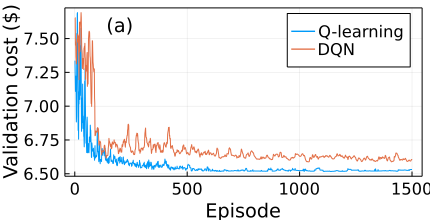

In [13]:
id = "AC1"
plot_convergence(id)
annotate!(200, 7.6, Plots.text("(a)", 13))
savefig(joinpath(img_dir, "RL_$id.pdf"))
current()

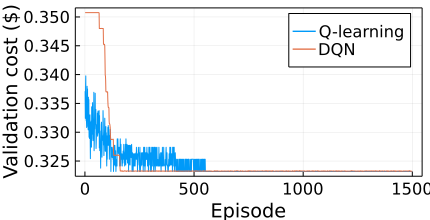

In [11]:
id = "DW"
plot_convergence(id)
annotate!(200, 5.01, Plots.text("(b)", 13))
savefig(joinpath(img_dir, "RL_$id.pdf"))
current()